In [25]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from sklearn.metrics import r2_score
#read the file
df = pd.read_csv('Cleaned_Stock_Data.csv',nrows=1250)

#print the head
df.head()

,Unnamed: 0,date,open,high,low,close,volume,Name
0,0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [12]:
data = df.sort_index(ascending=True, axis=0)
new_data=data[['date','open','high','low','close',]]

In [13]:
new_data.drop('date', axis=1, inplace=True)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
dataset = new_data.values
dataset.shape

(1250, 4)

In [15]:
train = dataset[0:900,:] #dividing data into training and validation set
valid = new_data[900:]

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))      #data scaling part
scaled_data = scaler.fit_transform(dataset)

In [17]:
x_train, y_train = [], []                #Data preprocessing
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0:4])
    y_train.append(scaled_data[i,0:4])
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],4)))
model.add(LSTM(units=50))
model.add(Dense(4))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=15, verbose=1)

Train on 840 samples
Epoch 1/5
840/840 [==============================] - 3s 4ms/sample - loss: 0.0181
Epoch 2/5
840/840 [==============================] - 1s 2ms/sample - loss: 0.0025
Epoch 3/5
840/840 [==============================] - 1s 2ms/sample - loss: 0.0021
Epoch 4/5
840/840 [==============================] - 1s 2ms/sample - loss: 0.0022
Epoch 5/5
840/840 [==============================] - 1s 2ms/sample - loss: 0.0019


In [20]:
inputs = new_data[len(new_data) - len(valid) - 60:].values         #Generating dataset for validation
inputs = scaler.transform(inputs)

In [21]:
X_test = []                 #Preprocessing for testing dataset
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0:4])
X_test = np.array(X_test)
X_test.shape

(350, 60, 4)

In [22]:
closing_price = model.predict(X_test)          #Predicting the validating dataset

In [23]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

open     46.091458
high     46.682722
low      45.518459
close    46.092120
dtype: float64

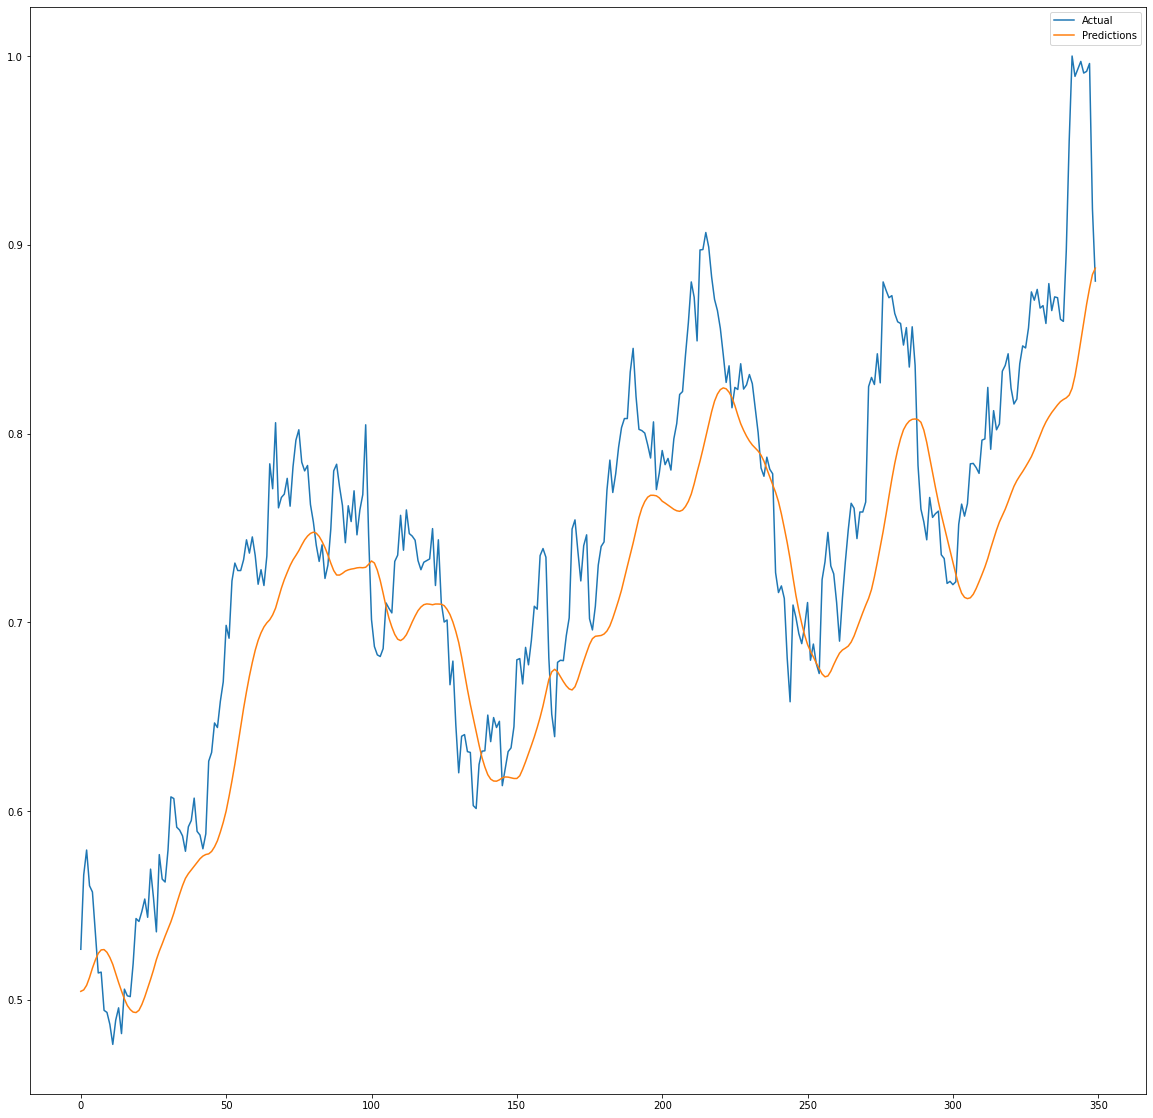

In [24]:
valid = pd.DataFrame(scaler.transform(valid),columns = valid.columns)
valid['Predictions'] = closing_price[:,3:4]
#plt.plot(train['open'])
plt.figure(figsize=(20,20))
plt.plot(valid[['close','Predictions']])
plt.legend(['Actual','Predictions'])

In [26]:
r2_score(valid['close'],valid['Predictions'])

0.7030508718462749